In [18]:
from google.colab import files
uploaded = files.upload()

Saving ESO_PC.csv to ESO_PC.csv
Saving FFXIV_PC.csv to FFXIV_PC.csv
Saving PoE_PC.csv to PoE_PC.csv


In [69]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [0]:
data = pd.read_csv('PlayerCount.csv')
dataffxiv = pd.read_csv('FFXIV_PC.csv')
datapoe = pd.read_csv('PoE_PC.csv')
dataeso = pd.read_csv('ESO_PC.csv')

In [34]:
data = data.rename(columns={'Final Fantasy XIV Player Count': 'FFXIV',
                        'Path of Exile Player Count': 'PoE',
                        'Elder Scroll Online Player Count' : 'ESO'})
data

DateTime  FFXIV    PoE    ESO
0      5/1/2015   5378   7639   2527
1      5/2/2015   6053   9259   3025
2      5/3/2015   6605   8717   3231
3      5/4/2015   6175   7930   2848
4      5/5/2015   5355   7120   2405
...         ...    ...    ...    ...
1675  12/1/2019  15424  19484  19228
1676  12/2/2019  13488  15676  16191
1677  12/3/2019  12377  14715  15922
1678  12/4/2019  11718  14319  15580
1679  12/5/2019  11599  13789  15033

[1680 rows x 4 columns]

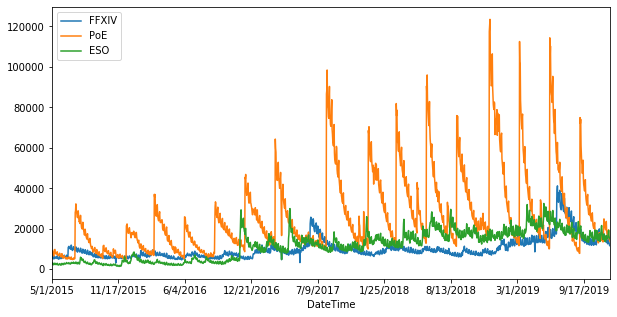

In [35]:
index = data.set_index('DateTime').plot(figsize=(10, 5))

In [0]:
dataffxiv['DateTime'] = pd.DatetimeIndex(dataffxiv['DateTime'])
datapoe['DateTime'] = pd.DatetimeIndex(datapoe['DateTime'])
dataeso['DateTime'] = pd.DatetimeIndex(dataeso['DateTime'])

dataffxiv = dataffxiv.rename(columns={'DateTime': 'ds', 'FFXIV': 'y'})
datapoe = datapoe.rename(columns={'DateTime': 'ds', 'PoE': 'y'})
dataeso = dataeso.rename(columns={'DateTime': 'ds', 'ESO': 'y'})

axffxiv = dataffxiv.set_index('ds')
axpoe = datapoe.set_index('ds')
axeso = dataeso.set_index('ds')

In [0]:
summersale = pd.DataFrame({'holiday' : 'Sale',
                           'ds' : pd.to_datetime(['2017-06-22', '2018-06-21', '2019-06-25']),
                           'lower_window' : 0,
                           'upper_window' : 14})

wintersale = pd.DataFrame({'holiday' : 'Sale',
                           'ds' : pd.to_datetime(['2017-06-21', '2018-06-20', '2019-06-19']),
                           'lower_window' : 0,
                           'upper_window' : 14})

holidays = pd.concat((summersale, wintersale))

In [81]:
my_modelffxiv = Prophet(daily_seasonality=True, holidays=holidays, holidays_prior_scale=20)
my_modelffxiv.fit(dataffxiv)

In [82]:
future_datesffxiv = my_modelffxiv.make_future_dataframe(periods=365, freq='D')
future_datesffxiv.tail()

ds
2040 2020-11-30
2041 2020-12-01
2042 2020-12-02
2043 2020-12-03
2044 2020-12-04

In [83]:
forecastffxiv = my_modelffxiv.predict(future_datesffxiv)
forecastffxiv[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
2040 2020-11-30  27593.020918  22228.168209  32971.564278
2041 2020-12-01  27076.854699  22151.713710  32225.416504
2042 2020-12-02  27021.194735  21871.203522  32584.104291
2043 2020-12-03  26778.485291  21298.383285  32128.299512
2044 2020-12-04  26971.715491  21966.609754  32347.400977

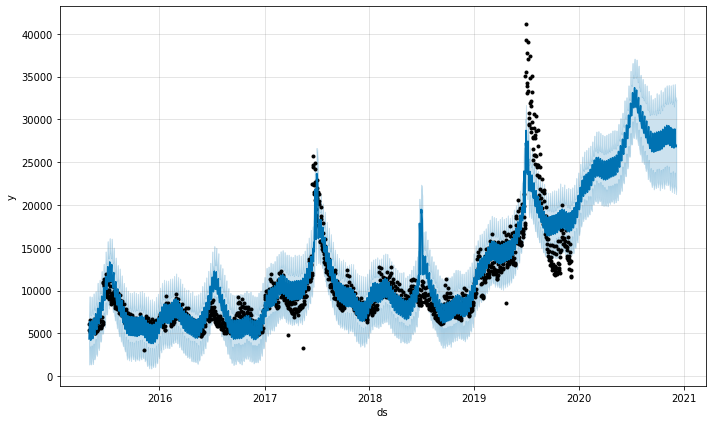

In [84]:
my_modelffxiv.plot(forecastffxiv, uncertainty=True)
plt.show()

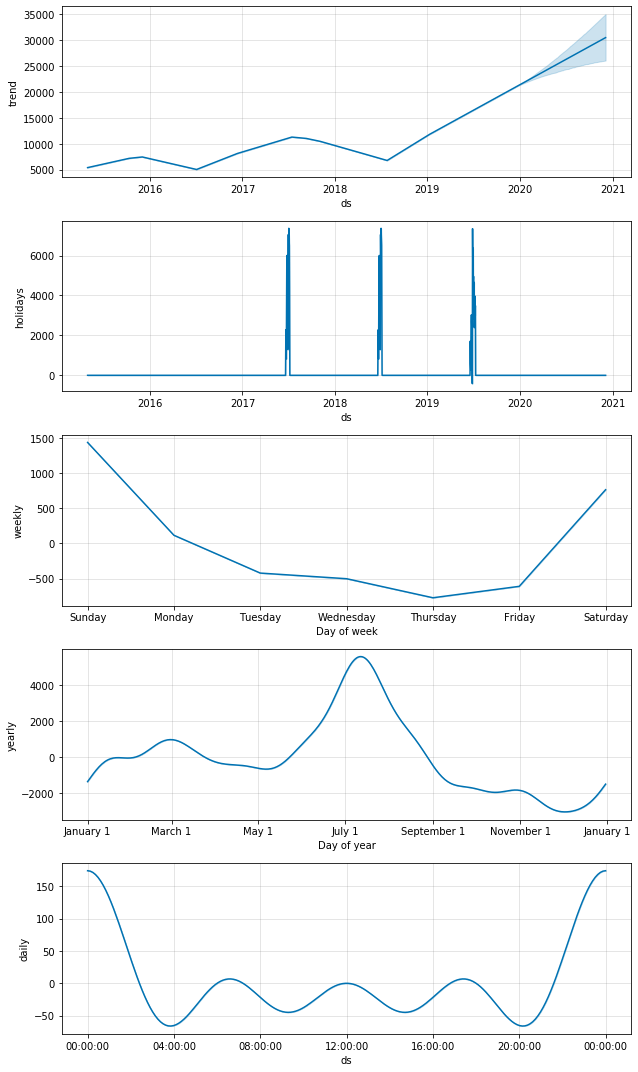

In [96]:
my_modelffxiv.plot_components(forecastffxiv)
plt.show()

In [85]:
my_modelpoe = Prophet(daily_seasonality=True)
my_modelpoe.fit(datapoe)

In [86]:
future_datespoe = my_modelpoe.make_future_dataframe(periods=365, freq='D')
future_datespoe.tail()

ds
2040 2020-11-30
2041 2020-12-01
2042 2020-12-02
2043 2020-12-03
2044 2020-12-04

In [87]:
forecastpoe = my_modelpoe.predict(future_datespoe)
forecastpoe[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat   yhat_lower    yhat_upper
2040 2020-11-30  14304.671452 -4231.188314  32795.253953
2041 2020-12-01  14445.571686 -2916.723089  32865.777862
2042 2020-12-02  15177.417173 -1572.908965  34355.701965
2043 2020-12-03  16504.312658  -883.259402  35092.148849
2044 2020-12-04  22535.386407  5855.023239  40474.249483

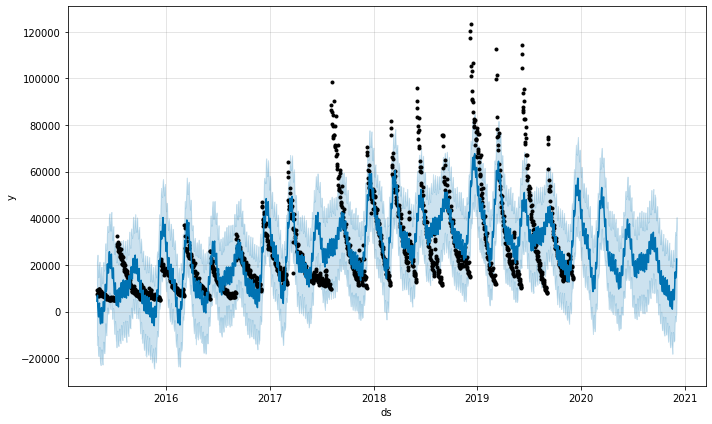

In [88]:
my_modelpoe.plot(forecastpoe, uncertainty=True)
plt.show()

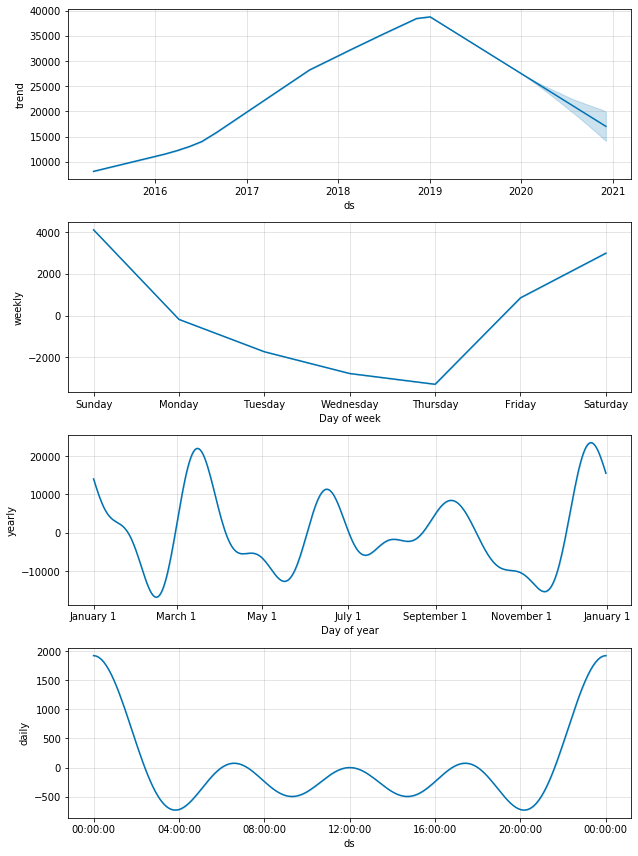

In [89]:
my_modelpoe.plot_components(forecastpoe)
plt.show()

In [90]:
my_modeleso = Prophet(daily_seasonality=True, holidays=holidays, holidays_prior_scale=20)
my_modeleso.fit(dataeso)

In [91]:
future_dateseso = my_modeleso.make_future_dataframe(periods=365, freq='D')
future_dateseso.tail()

ds
2040 2020-11-30
2041 2020-12-01
2042 2020-12-02
2043 2020-12-03
2044 2020-12-04

In [92]:
forecasteso = my_modeleso.predict(future_dateseso)
forecasteso[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
2040 2020-11-30  21732.875190  17245.865915  26096.947714
2041 2020-12-01  21131.382838  16446.898826  25521.351262
2042 2020-12-02  20826.436384  16228.677724  25168.194223
2043 2020-12-03  20864.104725  16116.261630  25581.325184
2044 2020-12-04  21111.223953  16805.304662  25664.279220

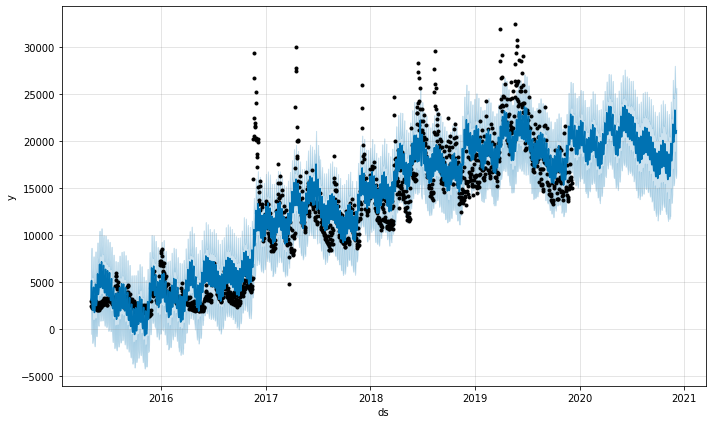

In [94]:
my_modeleso.plot(forecasteso, uncertainty=True)
plt.show()

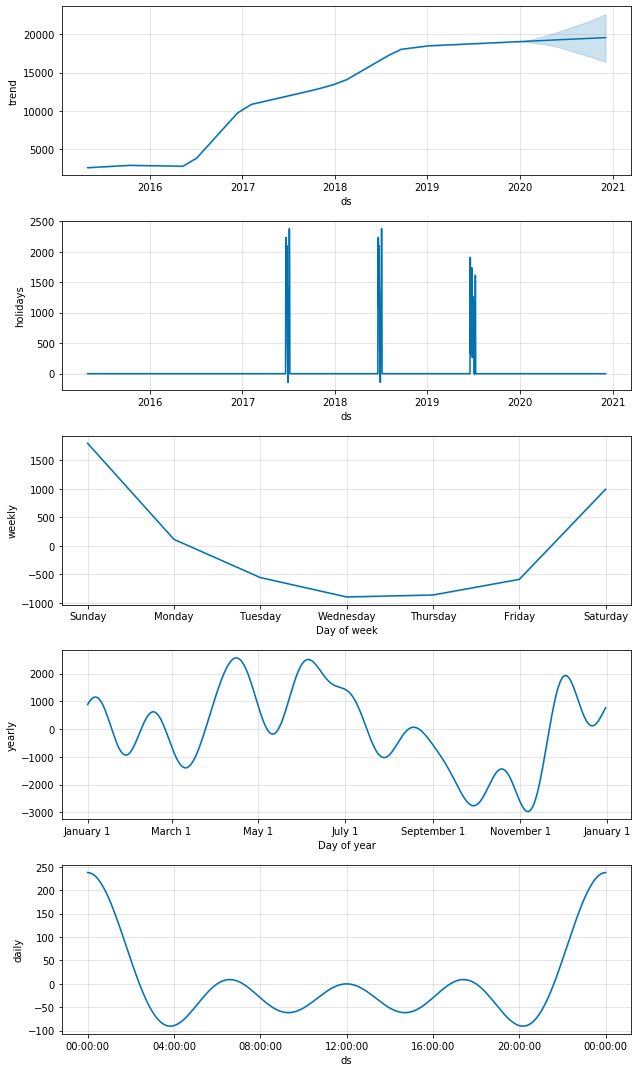

In [95]:
my_modeleso.plot_components(forecasteso)
plt.show()